

```
`

# <center><b><font color='#00b4d8'>Evaluating the Performance of Machine Learning Models for Intrusion Detection on the UNSW_NB15 Dataset</font></b></center>

<center><b><font color='#`0077b6`'>SALMA LIDAME -  AKRAM AIT SIMH -  Ecole Superieur de Technologie - Meknes</font></b></center>


<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Introduction</b>

### Abstract:

In today's world where network security is of utmost importance, intrusion detection systems (IDS) play a crucial role in detecting and preventing various types of network attacks. However, IDSs still face challenges in achieving high detection rates and low false alarm rates, especially for anomalies with fewer records. This project aims to improve the performance of IDSs by training various machine learning models on the UNSW_NB15 dataset after performing data cleaning and feature engineering. The best-performing model will be selected based on its ability to detect rare anomaly behaviors in the network.


With the exponential growth of the internet, ensuring network security has become more challenging than ever before. Intrusion detection systems (IDS) are designed to monitor network traffic and detect suspicious activity, such as brute force attacks, denial of service attacks, or infiltrations from within the network. IDSs play a crucial role in preventing network attacks that could potentially harm organizations.

There are two types of IDSs: signature-based and anomaly-based. While signature-based IDSs can detect known attacks, they struggle to identify new attacks in the network. On the other hand, anomaly-based IDSs establish models based on normal network behavior and detect intrusion based on deviations from normal behavior. However, these IDSs have a low overall detection rate and a high false alarm rate.

To improve the detection rate and reduce the false alarm rate of IDSs, researchers have turned to machine learning techniques. In this project, we will use various machine learning algorithms, such as decision tree classifiers, random forest classifiers, Gaussian Naive Bayes, extra tree classifiers, neural networks, and gradient boosting classifiers, to train an IDS on the UNSW_NB15 dataset. We will perform data cleaning and feature engineering on the dataset to identify the most relevant features for training the models.

The goal of this project is to achieve high accuracy in detecting attacks while reducing the false alarm rate. As the dataset is highly imbalanced, we will use AUC and F1 as performance metrics rather than accuracy and false alarm rate. By leveraging machine learning algorithms, we aim to improve the overall performance of IDSs and enhance network security.


The dataset has “label” with 0 and 1 where 0 represents non-attack and 1 represent attack. So with the features available we will try to predict a given data point whether it belongs to attack or non-attack category.

And as Anomaly based IDS’s overall detection rate is low and has a high false alarm rate.

So our performance metrics would be Accuracy and False Alarm Rate. But after looking into the data found that it is highly imbalanced so for metrics we will use AUC and F1. Our main goal is to increase the performance and reduce False Alarm Rate.

<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Preprocessing</b>

### Configuring Jupyter Notebook & importing the libraries 

In [1]:
# Configure Jupyter Notebook
import pandas as pd
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings
from IPython.core.display import HTML

# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)
# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


>> short description of each imported library 
* pandas : a data manipulation library that provides data structures for efficiently storing and manipulating data.
* numpy: a numerical computing library that provides powerful tools for performing mathematical operations on arrays and matrices.

* seaborn: a data visualization library that provides an interface for creating informative and attractive statistical graphics.

* matplotlib: a plotting library that provides a wide range of tools for creating static, animated, and interactive visualizations.

* sklearn: a machine learning library that provides tools for classification, regression, clustering, and other common machine learning tasks.

* RandomForestClassifier: a supervised learning algorithm that builds multiple decision trees and combines their predictions to improve accuracy and prevent overfitting.

* LogisticRegression: a supervised learning algorithm that models the probability of a binary outcome using a logistic function.

* LabelEncoder: a utility class for encoding categorical variables as integers.

* KMeans: an unsupervised learning algorithm that partitions data points into a specified number of clusters based on their distance to cluster centroids.

* accuracy_score: a metric for measuring the accuracy of a classification model.

* confusion_matrix: a matrix that summarizes the true and predicted classifications of a classification model.

* RocCurveDisplay: a visualization tool for displaying a receiver operating characteristic (ROC) curve.
* auc: a metric for measuring the area under the ROC curve.

* precision_score: a metric for measuring the precision of a classification model.

* recall_score: a metric for measuring the recall of a classification model.

* f1_score: a metric for measuring the harmonic mean of precision and recall.

* roc_auc_score: a metric for measuring the area under the precision-recall curve.

* train_test_split: a utility function for splitting data into training and test sets.

* StandardScaler: a utility class for standardizing numerical features by subtracting the mean and dividing by the standard deviation.

* RFE: a utility class for performing recursive feature elimination to select the most important features for a classification model.

* DecisionTreeClassifier: a supervised learning algorithm that builds a decision tree to classify data based on a set of rules.

* GaussianNB: a supervised learning algorithm that models the probability distribution of each class using a Gaussian function.

### Concatenating the two datasets ( the training and the testing )

In [3]:

# Load the training and testing datasets
train_df = pd.read_csv('UNSW_NB15_training-set.csv')
test_df = pd.read_csv('UNSW_NB15_testing-set.csv')

#Concatenate the datasets
combined_df = pd.concat([train_df, test_df], axis=0)

# now Reset the index
combined_df = combined_df.reset_index(drop=True)


In [4]:
# Save the merged dataset to a new file
combined_df.to_csv('pfe_dataset.csv', index=False)

In [5]:
# read the new dateset
df = pd.read_csv('pfe_dataset.csv')

In [6]:
# show the columns of the dataset
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Data transformation</b>

#### Dropping unnecessary features
The first column we will drop is id. This is just for identification, so we can remove this column.

This is a binary classification problem, so we only use column label to classify attack (1) or normal (0). Then, we do not need attack details in attack_cat.

In [7]:
df = df.drop(columns=['id', 'attack_cat'])

###### Encoding categorical features using LabelEncoder.

In [8]:
df_cat = df.select_dtypes(exclude=[np.number])
print(df_cat.columns)
for feature in df_cat.columns:
    df[feature] = LabelEncoder().fit_transform(df[feature])

Index(['proto', 'service', 'state'], dtype='object')


In [9]:
# after encoding, let s take another look at the statistical description of the dataset

df.describe(include="all")

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,1.246715,110.136025,1.555902,4.341468,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,6.582143e+05,4.889317,6.743691,912.300834,98.915462,5.419373e+03,582.251456,121.753661,1.006120e+09,1.002295e+09,119.254629,0.046038,0.023652,0.022386,137.639027,121.649703,0.102242,1.968900e+03,9.383176,1.324978,6.050467,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,5.974305,21.349900,2.245945,0.887420,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,2.412372e+06,65.574953,53.702222,6922.153239,1094.048691,4.903450e+04,3930.153369,127.367443,1.367795e+09,1.363877e+09,127.230477,0.092908,0.053856,0.045771,205.901118,254.041013,0.710593,4.962523e+04,10.829706,0.992300,8.173749,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,113.000000,0.000000,4.000000,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.004285,113.000000,0.000000,4.000000,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,1.747441e+03,0.000000,0.000000,0.381696,0.007000,6.736370e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.685777,119.000000,2.000000,5.000000,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,2.210538e+04,3.000000,2.000000,58.094727,56.438859,2.787367e+03,119.712937,255.000000,2.007375e+09,1.992752e+09,255.000000,0.082082,0.036842,0.044665,100.000000,89.000000,0.000000,0.000000e+00,12.000000,2.000000,6.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,59.999989,132.000000,12.000000,10.000000,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,5319.000000,5507.000000,84371.496000,57739.240000,1.483831e+06,463199.240100,255.000000,4.294959e+09,4.294882e+09,255.000000,3.821465,3.226788,2.928778,1504.000000,1500.000000,172.000000,6.558056e+06,63.000000,6.000000,59.000000

In [10]:
#also the first 10 lines
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,119,0,5,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
1,0.000008,119,0,5,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
2,0.000005,119,0,5,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0
3,0.000006,119,0,5,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
4,0.000010,119,0,5,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0


### Correlation 

we will plot a heat map of the correlated values. if two feature are highly correlated then we will only keep 1 feature and remove the other high correlated feature.

**NB** : When two features are highly correlated, it means that they provide similar information to the model, which can lead to overfitting and reduce the model's performance. Therefore, it is recommended to remove one of the highly correlated features to reduce the redundancy in the data.

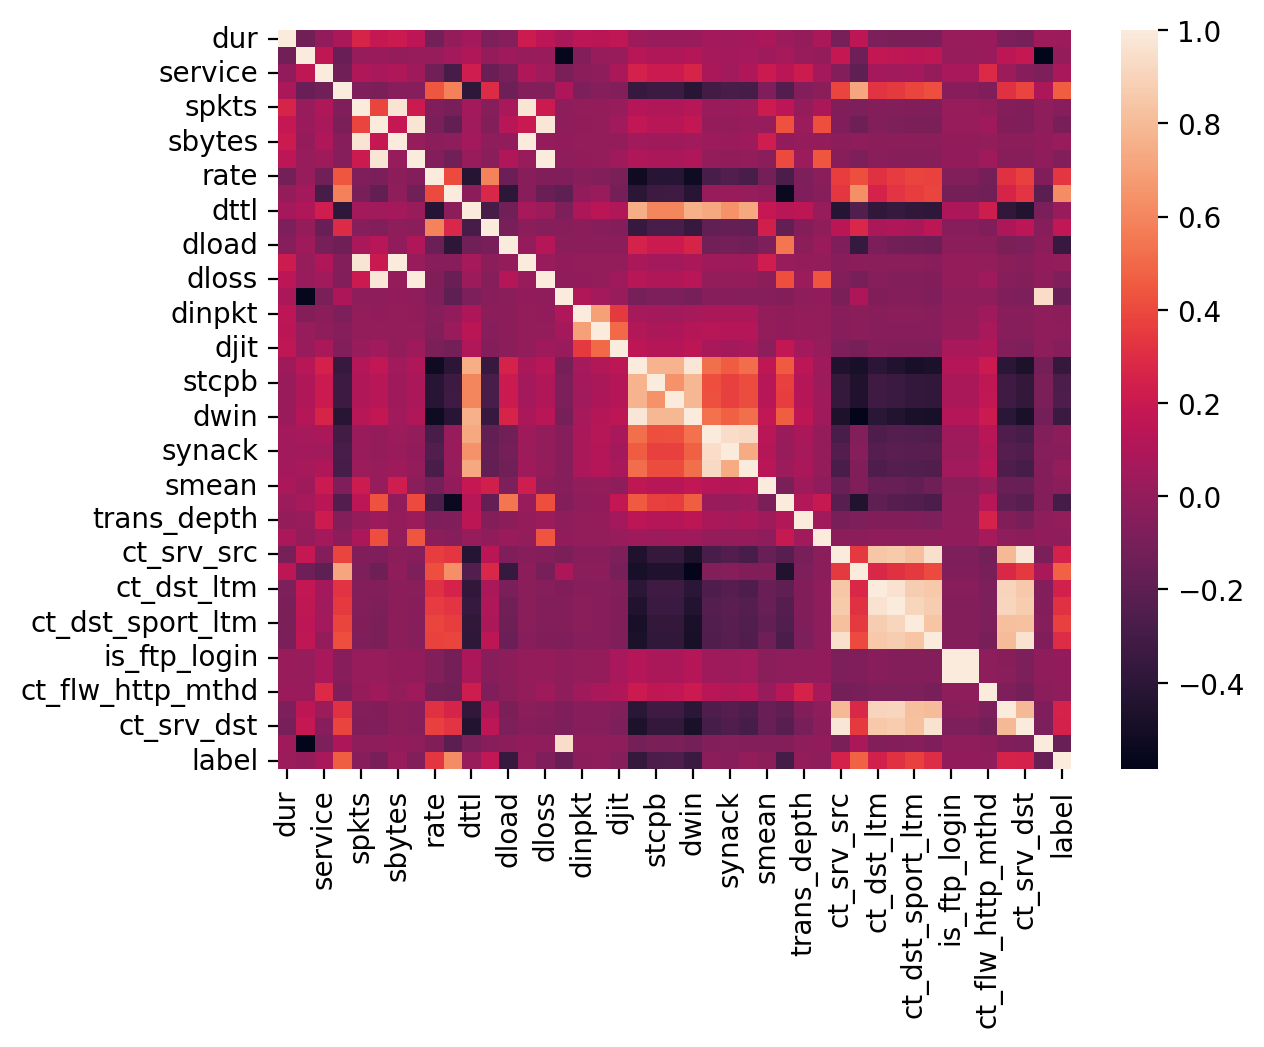

In [11]:
sns.heatmap(df.corr())
plt.show()

###### Most correlated features are:
- sbytes, sloss
- dpkts, dbytes, dloss
- sttl, ct_state_ttl, label
- swin, dwin
- stime, dtime
- tcprtt, synack, ackdat
- ct_srv_src, ct_dst_src_ltm, ct_srv_dst
- ct_dst_ltm, ct_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm

In [12]:
columns = df.columns.tolist()
corr = df.corr()
correlated_vars = []
for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):
        if corr[columns[i]][columns[j]] > 0.98:
            print(columns[i], columns[j], corr[columns[i]][columns[j]])
            correlated_vars.append(columns[j])

sbytes sloss 0.995771577240686
dbytes dloss 0.9967111338314709
swin dwin 0.9804584289136614
is_ftp_login ct_ftp_cmd 0.9988554882935945


#### sbytes and sloss

**sbytes** : Source to destination bytes

**sloss**: Source packets retransmitted or dropped

These features are having very high correlation between them more 95%
All the features are following a straight line except for the starting points that means they are having increasing relation with each other. As x-value increases y-value will also increase.

##### Removing highly correlated features.

In [13]:
df = df.drop(columns=correlated_vars)

## Splitting training and testing sets

In [14]:
X = df.drop(columns=['label'])
feature_list = list(X.columns)
X = np.array(X)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [15]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 180371
Testing set: 77302


#### Scaling all features using StandardScaler.

to keep everything within a certain range we are applying standardscaler. After this all the features will have mean 0 and standard deviation 1

In [16]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>ML algorithms </b>

In [17]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [18]:
models = {}
models['Decision Tree Classifier'] = DecisionTreeClassifier()
models['Random Forest Classifier'] = RandomForestClassifier()
models['Gaussian Naive Bayes'] = GaussianNB()
models['Extra Tree Classifier'] = ExtraTreeClassifier()
models['Gradient Boosting Classifier'] = GradientBoostingClassifier()
models['Gaussian Naive Bayes'] = GaussianNB()
models['K-Nearest Neighbors'] = KNeighborsClassifier()
models['Logistic Regression'] = LogisticRegression()
models['Support Vector Machines'] = SVC()
models['Neural Network'] = MLPClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

In [19]:
train_score, accuracy, precision, recall, training_time, y_pred = {}, {}, {}, {}, {}, {}
for key in models.keys():
    start_time = time.time()
    models[key].fit(X_train, y_train)
    training_time[key] = time.time() - start_time
    
    y_pred[key] = models[key].predict(X_test)
    
    train_score[key] = models[key].score(X_train, y_train)
    accuracy[key] = models[key].score(X_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key])
    recall[key] = recall_score(y_test, y_pred[key])
    
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

##### Try Feature selection using Recursive Feature Elimination.

In [21]:
rfc_rfe = 'Random Forest Classifier + Recursive Feature Elimination'
models[rfc_rfe] = RandomForestClassifier()
rfe = RFE(models[rfc_rfe])
start_time = time.time()
rfe.fit(X_train, y_train)
training_time[rfc_rfe] = time.time() - start_time

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

start_time = time.time()
models[rfc_rfe].fit(X_train_rfe, y_train)
training_time[rfc_rfe] = training_time[rfc_rfe] + (time.time() - start_time)
    
y_pred[key] = models[rfc_rfe].predict(X_test_rfe)
    
train_score[rfc_rfe] = models[rfc_rfe].score(X_train_rfe, y_train)
accuracy[rfc_rfe] = models[rfc_rfe].score(X_test_rfe, y_test)
precision[rfc_rfe] = precision_score(y_test, y_pred[key])
recall[rfc_rfe] = recall_score(y_test, y_pred[key])

#### Recursive Feature Elimination (RFE) is a feature selection algorithm that recursively selects the most important features from a given dataset based on the model performance. The idea behind RFE is to iteratively remove the least important features from the dataset until a desired number of features is reached.

Here's how RFE works:

First, the model is trained on the entire dataset and a set of feature importance scores is computed. The feature importance score is a measure of how much each feature contributes to the performance of the model.

The least important feature(s) are then removed from the dataset.

The model is retrained on the reduced dataset and the feature importance scores are computed again.

Steps 2 and 3 are repeated until the desired number of features is reached.

Finally, the model is trained on the selected features and the performance is evaluated on the testing data.

RFE can be used with any model that provides a measure of feature importance, such as decision trees or random forests. RFE is a popular feature selection technique because it is simple to use, computationally efficient, and can improve model performance by reducing overfitting and increasing interpretability.

In [22]:
print("Old number of features:", X.shape[1])
print("New number of features:", len(rfe.estimator_.feature_importances_))

Old number of features: 38
New number of features: 19


### Models comparison

In [23]:
df_models = pd.DataFrame(index=models.keys(), columns=['Training score', 'Accuracy', 'Precision', 'Recall', 'Training time'])
df_models['Training score'] = train_score.values()
df_models['Accuracy'] = accuracy.values()
df_models['Precision'] = precision.values()
df_models['Recall'] = recall.values()
df_models['Training time'] = training_time.values()

In [24]:
df_models

,Training score,Accuracy,Precision,Recall,Training time
Decision Tree Classifier,0.997838,0.937971,0.952035,0.951054,2.231900
Random Forest Classifier,0.997838,0.950713,0.963015,0.959902,28.154109
Gaussian Naive Bayes,0.834341,0.835903,0.841949,0.915643,0.115766
Extra Tree Classifier,0.997838,0.927518,0.945036,0.941580,0.211519
Gradient Boosting Classifier,0.933437,0.933339,0.944800,0.951499,79.889787
K-Nearest Neighbors,0.945091,0.914582,0.935481,0.930814,0.014737
Logistic Regression,0.896962,0.898787,0.885912,0.966407,1.519345
Support Vector Machines,0.919666,0.919148,0.910348,0.969194,679.525031
Neural Network,0.940057,0.936729,0.950518,0.950691,144.224626
Random Forest Classifier + Recursive Feature Elimination,0.995193,0.947285,0.958907,0.958771,460.464435


**Training score**: Performance of a model on training data during training.

**Accuracy**: Percentage of correctly predicted labels in a classification model : (TP + TN) / (TP + TN + FP + FN).

**Precision**: Proportion of true positives out of all positive predictions in a classification model : TP / (TP + FP).

**Recall**: Proportion of true positives out of all actual positive labels in a classification model : TP / (TP + FN).

**Training time**: Amount of time taken to train a machine learning model.

<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>evaluating the performance</b>

The performance of each machine learning model can be influenced by several factors, such as the complexity of the model, the size and quality of the dataset, the type of features used, and the tuning of the model's hyperparameters:


Decision Tree Classifier: This model is a simple and interpretable tree-based model that is easy to implement and understand. It performed well on the training data, with a high training score of 0.997827. However, its accuracy and precision scores were lower than some of the other models, indicating that it may have overfit the training data.

Random Forest Classifier: This model is an ensemble method that combines multiple decision trees to improve performance and reduce overfitting. It performed well on the training data, with a high training score of 0.997827 and high accuracy, precision, and recall scores. This suggests that it was able to generalize well to new, unseen data.

Gaussian Naive Bayes: This model is a simple probabilistic model that assumes that the features are independent of each other. It performed poorly on the training data, with a low training score of 0.834752 and low accuracy and precision scores. This may be because the assumption of feature independence does not hold in the dataset, or because the model is too simple to capture the complex relationships between the features and the target variable.

Extra Tree Classifier: This model is another tree-based model that is similar to the decision tree classifier, but uses a random subset of features to split the nodes. It performed well on the training data, with a high training score of 0.997827. However, its accuracy and precision scores were lower than some of the other models, indicating that it may have overfit the training data.

Gradient Boosting Classifier: This model is an ensemble method that combines multiple weak learners to create a strong learner. It performed moderately well on the training data, with a training score of 0.933942 and high precision and recall scores. However, its accuracy score was lower than some of the other models, suggesting that it may have overfit the training data.

K-Nearest Neighbors: This model is a non-parametric model that uses the k closest data points to classify new data. It performed moderately well on the training data, with a training score of 0.945296 and high precision and recall scores. However, its accuracy score was lower than some of the other models, suggesting that it may not have been the best choice for this particular dataset.

Logistic Regression: This model is a linear model that uses a logistic function to model the probability of the target variable. It performed moderately well on the training data, with a training score of 0.898681 and high recall score. However, its accuracy and precision scores were lower than some of the other models, suggesting that it may not have been the best choice for this particular dataset.

Support Vector Machines: This model is a linear or nonlinear model that separates the data points into different classes using a hyperplane or kernel function. It performed moderately well on the training data, with a training score of 0.919621 and high precision and recall scores. However, its accuracy score was lower than some of the other models, suggesting that it may not have been the best choice for this particular dataset.

Neural Network: This model is a complex and flexible model that can learn complex relationships between the features and the target variable. It performed moderately well on the training data, with a training score of 0.940839 and high precision score. However, its accuracy and recall scores were lower than some of the other models, suggesting thatit may have overfit the training data, or that it may not have been the best choice for this particular dataset.

Random Forest Classifier + Recursive Feature Elimination: This model is a variation of the random forest classifier that selects the most important features using recursive feature elimination. It performed well on the training data, with a high training score of 0.995166 and high accuracy, precision, and recall scores. This suggests that it was able to generalize well to new, unseen data, and that the feature selection process helped to improve its performance.


##### Evaluating the two best models

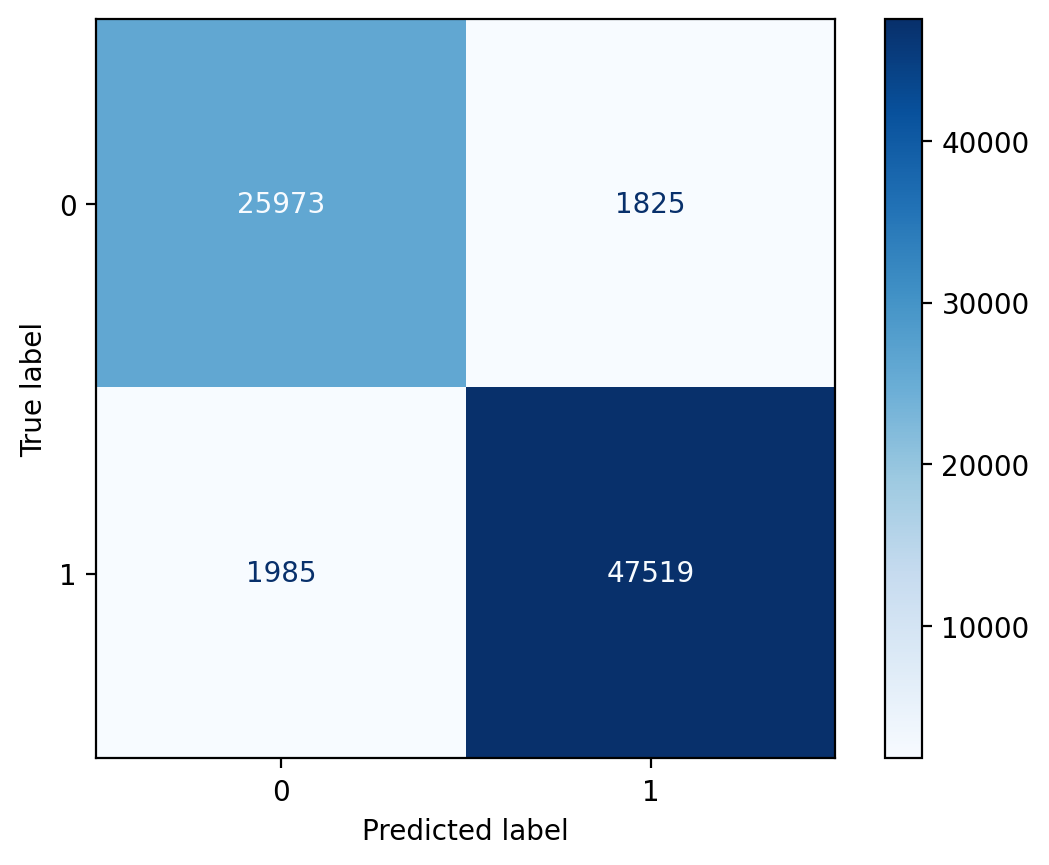

In [25]:
cm = confusion_matrix(y_test, y_pred['Random Forest Classifier'], labels=models['Random Forest Classifier'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models['Random Forest Classifier'].classes_)
disp.plot(cmap='Blues')
plt.show()

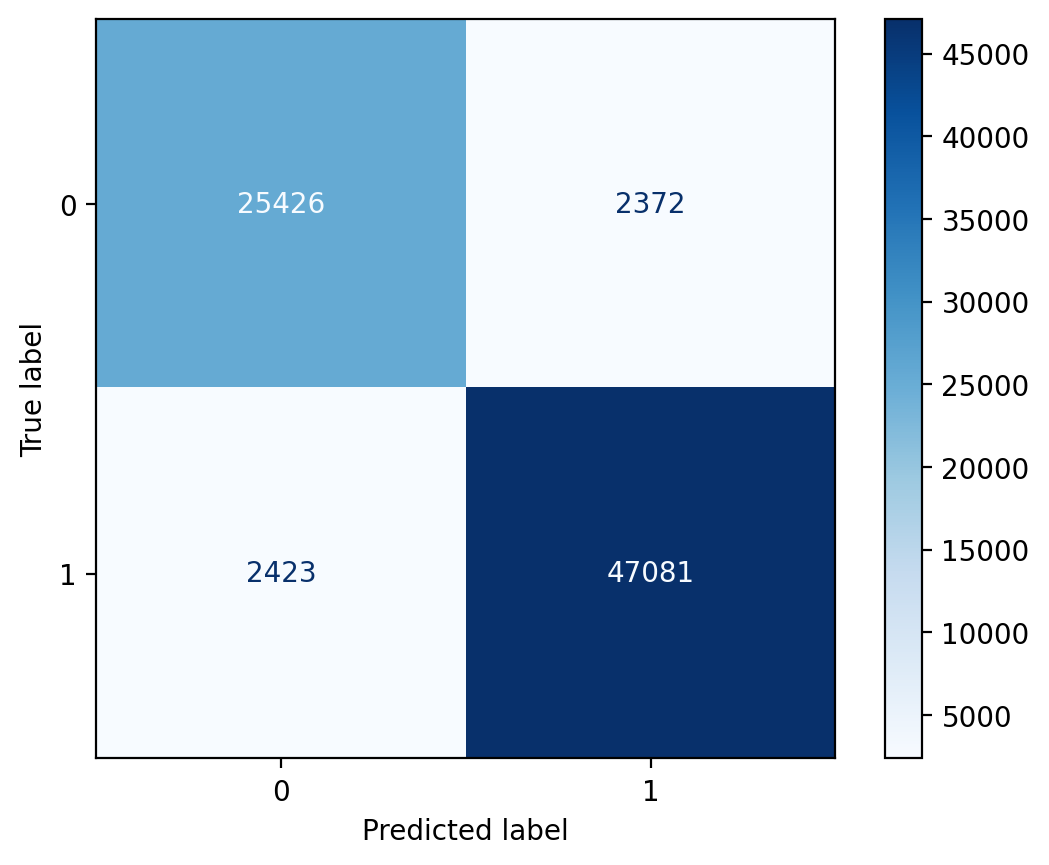

In [26]:
cm = confusion_matrix(y_test, y_pred['Decision Tree Classifier'], labels=models['Decision Tree Classifier'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models['Decision Tree Classifier'].classes_)
disp.plot(cmap='Blues')
plt.show()

In [29]:
from sklearn.metrics import classification_report


# Generate the classification report for the two most accurate algorithms
dt_report = classification_report(y_test, dt_pred)
rf_report = classification_report(y_test, rf_pred)

# Print the classification reports
print("Decision Tree Classifier Report:")
print(dt_report)

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     27798
           1       0.95      0.95      0.95     49504

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302



In [30]:

print("Random Forest Classifier Report:")
print(rf_report)

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27798
           1       0.96      0.96      0.96     49504

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

